<a href="https://colab.research.google.com/github/yokahealthcare/Anasa-GAN/blob/master/%5BMain_v2%5D%20%5BAE%5D%20Breathing_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AE - AutoEncoder

## Project Strucuture

### PART 1 : Data Preprocessing


1.   Filter the zeros values (except if in the first column)
2.   Separate the data(q) according to labels
3.   Seperate q into data(X) and label(Y)
4.   Normalize the data
> X normalized using MinMaxScaler between 0 and 1
>
> Y normalized using one-hot encoding

### PART 2 : Neural Network
1.   NN Structure
2.   Optimizer : Adam(learning_rate=0.0001)
3.   Loss      : MAE (Mean Average Error)

### PART 3 : Training
1.   Training
2.   Smoothing using Savitzky-Golay filter


## PART 1 : Data Preprocessing

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

### Download the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yokahealthcare/Anasa-GAN/master/dataset/breathing_waveform_data.csv").iloc[:, :-1] # get rid of last column ("notes")

### Filter the zeros values
> This will filtered the zeros value from all column (except first column)
>
> CAUSE : I think is natural for the first column to be 0.0 (because the time(X) still on 0 second)

In [3]:
zeros_val = df[df.iloc[:, 1:].eq(0).any(axis=1)]

In [4]:
zeros_val

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
5473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


### Drop the table that has value zeros on it

In [5]:
df = df[~df.isin(zeros_val)].dropna()

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
0,0.483309,0.459790,0.431024,0.376565,0.295734,0.193290,0.066060,-0.083445,-0.247221,-0.409374,...,0.391514,0.452677,0.521407,0.595845,0.661691,0.702932,0.708613,0.682564,0.637765,deep
1,-2.044518,-1.935588,-1.808629,-1.667919,-1.513497,-1.348760,-1.171044,-0.972509,-0.759554,-0.547793,...,0.138731,-0.053860,-0.241691,-0.417603,-0.582320,-0.738485,-0.889731,-1.037066,-1.174654,deep
2,-1.213535,-1.269056,-1.323306,-1.375251,-1.430062,-1.485479,-1.529200,-1.557172,-1.574662,-1.575457,...,0.947940,0.996154,1.035743,1.049543,1.024204,0.954716,0.844505,0.702445,0.541555,deep
3,-0.914806,-0.887726,-0.856065,-0.823527,-0.794551,-0.768074,-0.740895,-0.713364,-0.685445,-0.652020,...,-0.478218,-0.571465,-0.684115,-0.817078,-0.966231,-1.122537,-1.264759,-1.376908,-1.461059,deep
4,-1.547469,-1.458818,-1.362120,-1.264829,-1.164948,-1.060064,-0.954496,-0.849448,-0.742812,-0.636614,...,0.227050,0.130983,0.041438,-0.038034,-0.106152,-0.163048,-0.210926,-0.253102,-0.290270,deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,-0.152463,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,...,-0.336787,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,quick
26396,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,...,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,quick
26397,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,...,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,quick
26398,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,0.294399,...,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,0.264014,quick


In [7]:
df['labels'].value_counts()

normal        19060
quick          2667
hold           2133
deep           1066
deep_quick      800
Name: labels, dtype: int64

### Separate the data according to their labels

In [8]:
normal_df = df[df['labels'] == "normal"]
quick_df = df[df['labels'] == "quick"]
hold_df = df[df['labels'] == "hold"]
deep_df = df[df['labels'] == "deep"]
deep_quick_df = df[df['labels'] == "deep_quick"]

### Seperate the data (X) and the label (Y)

In [9]:
X = normal_df.iloc[:, :-1]
Y = normal_df.iloc[:, -1]

### Normalize the data

In [10]:
# Data (X)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
# Label (Y)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers [0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
hot_y = np_utils.to_categorical(encoded_Y)

# PART 2 : Setup The Neural Network

### Importing Neural Network Libraries

In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Activation
from tensorflow.keras import activations
from tensorflow.keras.models import Model

### Neural Network : Deep Fully Connected

In [13]:
class AE(Model):
  def __init__(self):
    super(AE, self).__init__()

    ### Encoder ###
    self.encoder = Sequential()
    # First Layer
    self.encoder.add(Dense(64, input_shape=(85,)))
    self.encoder.add(LeakyReLU())
    self.encoder.add(Dropout(0.2))
    # Second Layer
    self.encoder.add(Dense(32))
    self.encoder.add(LeakyReLU())
    # Third Layer
    self.encoder.add(Dense(16))
    self.encoder.add(LeakyReLU())
    # Fourth Layer
    # It Has Latent Space Dimension of 8
    self.encoder.add(Dense(8))
    self.encoder.add(LeakyReLU())

    ### Decoder ###
    self.decoder = Sequential()
    # First Layer
    self.decoder.add(Dense(16, input_shape=(8, )))
    self.encoder.add(LeakyReLU())
    # Second Layer
    self.decoder.add(Dense(32))
    self.decoder.add(LeakyReLU())
    # Third Layer
    self.decoder.add(Dense(64))
    self.decoder.add(LeakyReLU())
    # Fourth Layer
    self.decoder.add(Dense(85))
    self.decoder.add(Activation(activations.sigmoid))

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

### Neural Network : Recurrent Neural Network

In [13]:
feature = 5
X_3d = np.reshape(X, (X.shape[0], int(85/feature), feature))
# (26400, 17, 5)
# 5 indicator will be used per sequence/timestep per sample/row
X_3d.shape

(19060, 17, 5)

In [35]:
class AE(Model):
    def __init__(self, dropout_rate=0.2, init_mode='glorot_uniform', init_recurrent='orthogonal', init_units=60):
      super(AE, self).__init__()

      ### Encoder ###
      self.encoder = Sequential()

      # first layer
      self.encoder.add(LSTM(units=init_units, kernel_initializer=init_mode, recurrent_initializer=init_recurrent, return_sequences=True, input_shape=(17, 5)))
      self.encoder.add(Dropout(dropout_rate))    # Ignore xx% of the neuron (ex. 50 * 20% = 10 neuoron will be ignored)

      # second layer
      self.encoder.add(LSTM(units=init_units, return_sequences=True))
      self.encoder.add(Dropout(dropout_rate))

      # third layer
      # self.encoder.add(LSTM(units=20, return_sequences=True))
      # self.encoder.add(Dropout(dropout_rate))

      # fourth layer
      self.encoder.add(LSTM(units=init_units))
      self.encoder.add(Dropout(dropout_rate))

      # last layer
      self.encoder.add(Dense(units=16))
      self.encoder.add(Activation(activations.sigmoid))

      ### Decoder ###
      self.decoder = Sequential()

      # first layer
      self.decoder.add(LSTM(units=init_units, kernel_initializer=init_mode, recurrent_initializer=init_recurrent, return_sequences=True, input_shape=(8, 2)))
      self.decoder.add(Dropout(dropout_rate))    # Ignore xx% of the neuron (ex. 50 * 20% = 10 neuoron will be ignored)

      # second layer
      self.decoder.add(LSTM(units=init_units, return_sequences=True))
      self.decoder.add(Dropout(dropout_rate))

      # third layer
      # self.decoder.add(LSTM(units=20, return_sequences=True))
      # self.decoder.add(Dropout(dropout_rate))

      # fourth layer
      self.decoder.add(LSTM(units=init_units))
      self.decoder.add(Dropout(dropout_rate))

      # last layer
      self.decoder.add(Dense(units=85))
      self.decoder.add(Activation(activations.sigmoid))


      """
      ### Decoder ###
      self.decoder = Sequential()
      # First Layer
      self.decoder.add(Dense(16, input_shape=(17, )))
      self.encoder.add(LeakyReLU())
      # Second Layer
      self.decoder.add(Dense(32))
      self.decoder.add(LeakyReLU())
      # Third Layer
      self.decoder.add(Dense(64))
      self.decoder.add(LeakyReLU())
      # Fourth Layer
      self.decoder.add(Dense(85))
      self.decoder.add(Activation(activations.sigmoid))
      """

    def call(self, x):
      encoded = self.encoder(x)

      print("type : {}".format(type(encoded)))
      print("shape : {}".format(encoded.shape))

      encoded = tf.reshape(encoded, (None, 8, 2))

      decoded = self.decoder(encoded)
      return decoded

In [36]:
from keras.optimizers import Adam

# Create new autoencoder object
autoencoder = AE()
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

## PART 3 : Training

In [37]:
# Fit the Model
model = autoencoder.fit(X_3d, X,
          epochs=10,
          batch_size=32,
          shuffle=True, verbose=1)

Epoch 1/10
type : <class 'tensorflow.python.framework.ops.Tensor'>
shape : (None, 16)


TypeError: ignored

### Plot the training loss graph

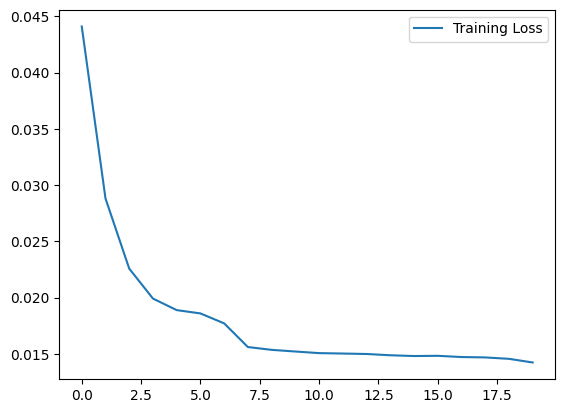

In [20]:
plt.plot(model.history["loss"], label="Training Loss")
plt.legend()

### Define a function to smoothing the wave curve

In [17]:
# smoothing the wave of decoded_data
from scipy.signal import savgol_filter

def smooth_wave(wave):
  # Define the parameters for the Savitzky-Golay filter
  window_length = 10  # The length of the window (odd number)
  polyorder = 2  # The order of the polynomial fit

  return savgol_filter(wave, window_length, polyorder)

### Testing the model

In [18]:
encoded_data = autoencoder.encoder(X_3d).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

# Apply the Savitzky-Golay filter
decoded_data = smooth_wave(decoded_data)

### Calculate the Mean Average Error (MAE) from all data

In [24]:
loss = tf.keras.losses.mae(decoded_data, X)
print("Mean Average Error : {}".format(np.mean(loss * 100)))

Mean Average Error : 1.2059950203158654


### Plot the result

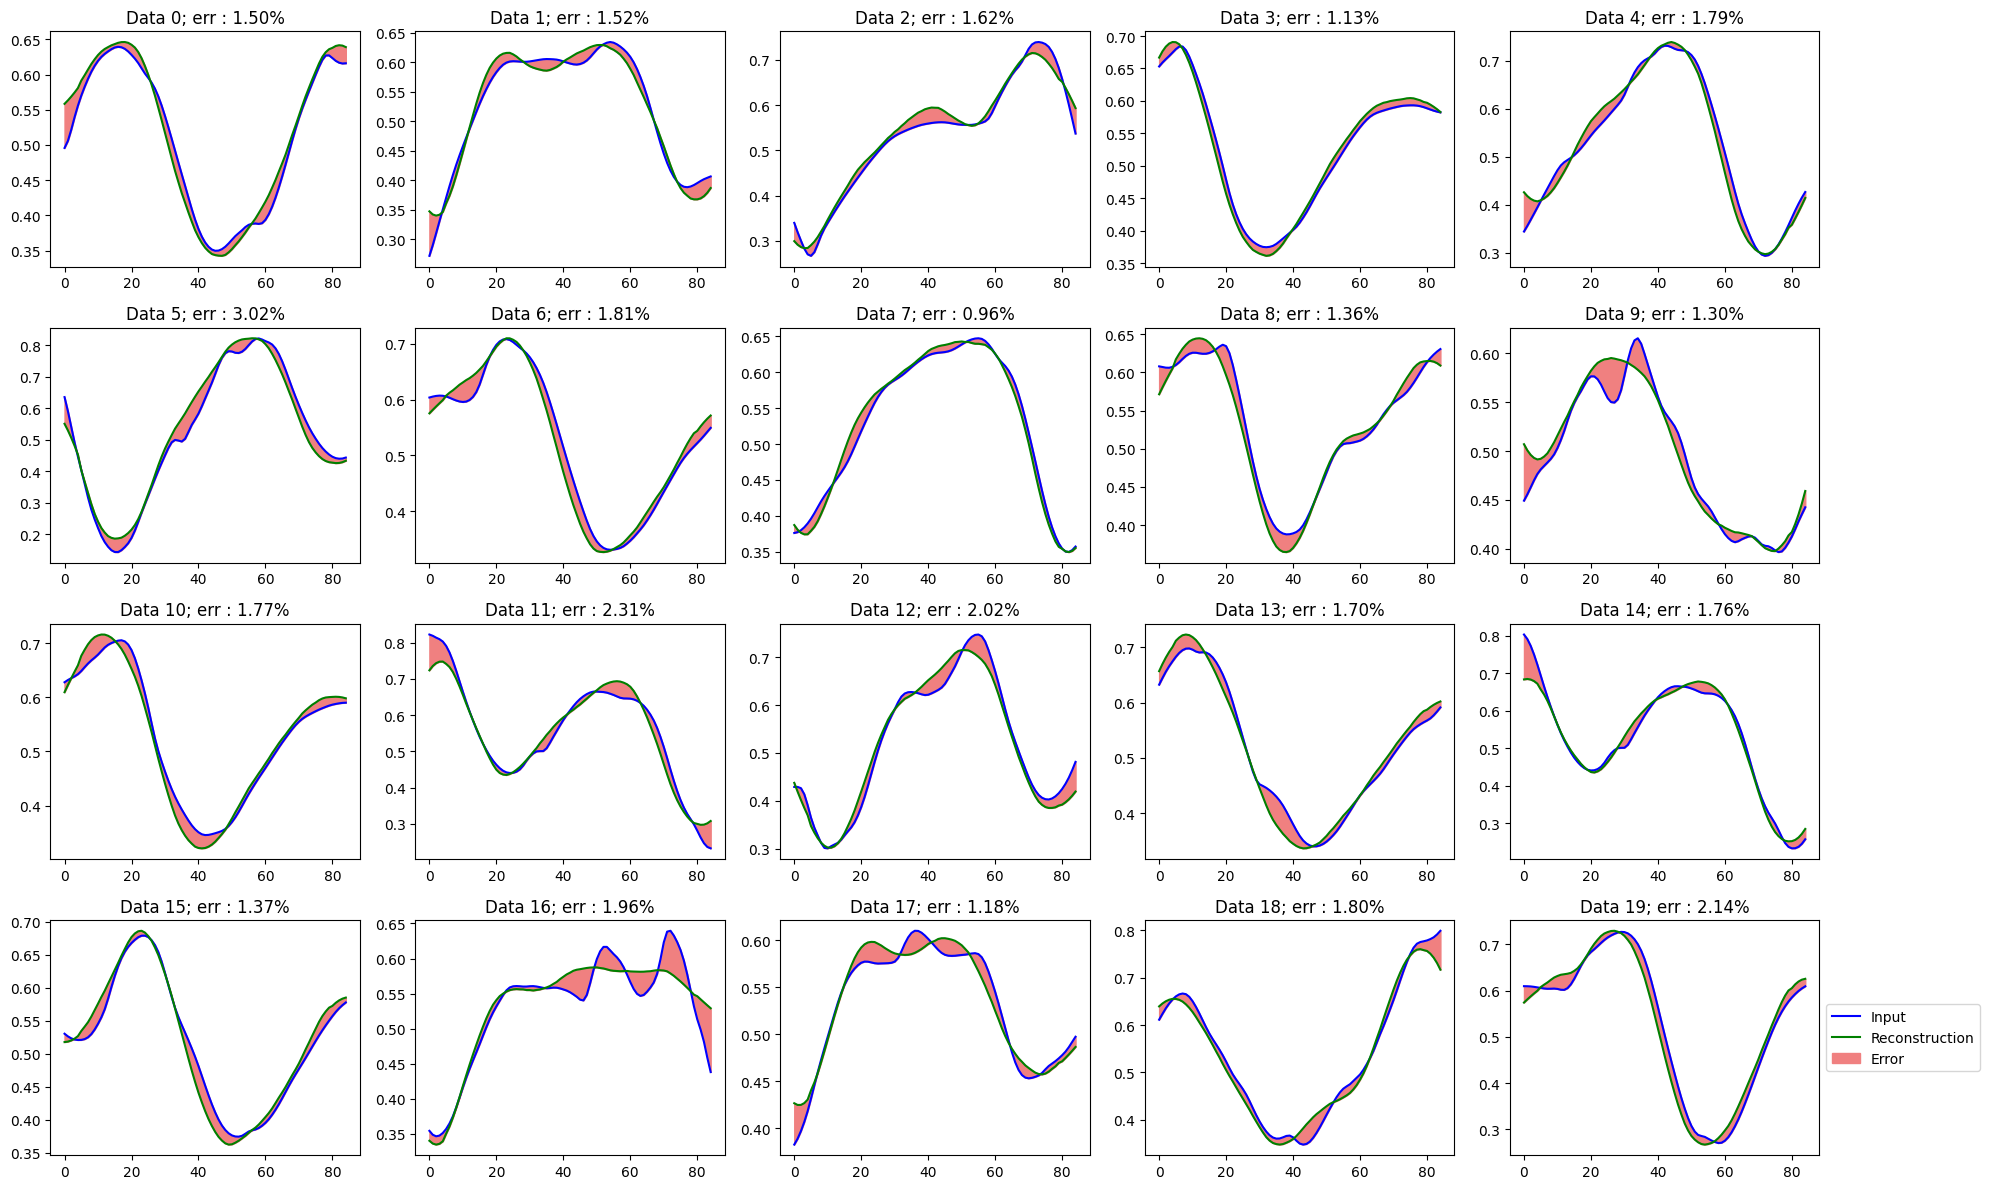

In [25]:
num_samples = 20
row = int(num_samples / 5)

# Create figure and axis objects
fig, ax = plt.subplots(row, 5, figsize=(20,row*3))

idx=0
for y in range(row):
  for x in range(5):
    # Plot each time series
    ax[y, x].plot(X[idx], 'b')
    ax[y, x].plot(decoded_data[idx], 'g')
    ax[y, x].fill_between(np.arange(X.shape[1]), decoded_data[idx], X[idx], color='lightcoral')
    ax[y, x].set_title("Data {}; err : {:.2f}%".format(idx, loss[idx]*100))
    #ax[y, x].legend()

    idx += 1

# legend
plt.legend(labels=["Input", "Reconstruction", "Error"], loc='center left', bbox_to_anchor=(1, 0.5))

# Customize the overall layout
plt.tight_layout()

# Show
plt.show()



## PART 4 : Generating New Data

In [26]:
# Set the number of data points to generate
num_samples = 10

# Randomly sample latent vectors from a predefined range
latent_dim = 85
latent_vectors = np.random.rand(*(num_samples, latent_dim))

# Generate new data by decoding the latent vectors
generated_data = autoencoder.predict(latent_vectors)

ValueError: ignored

NameError: ignored

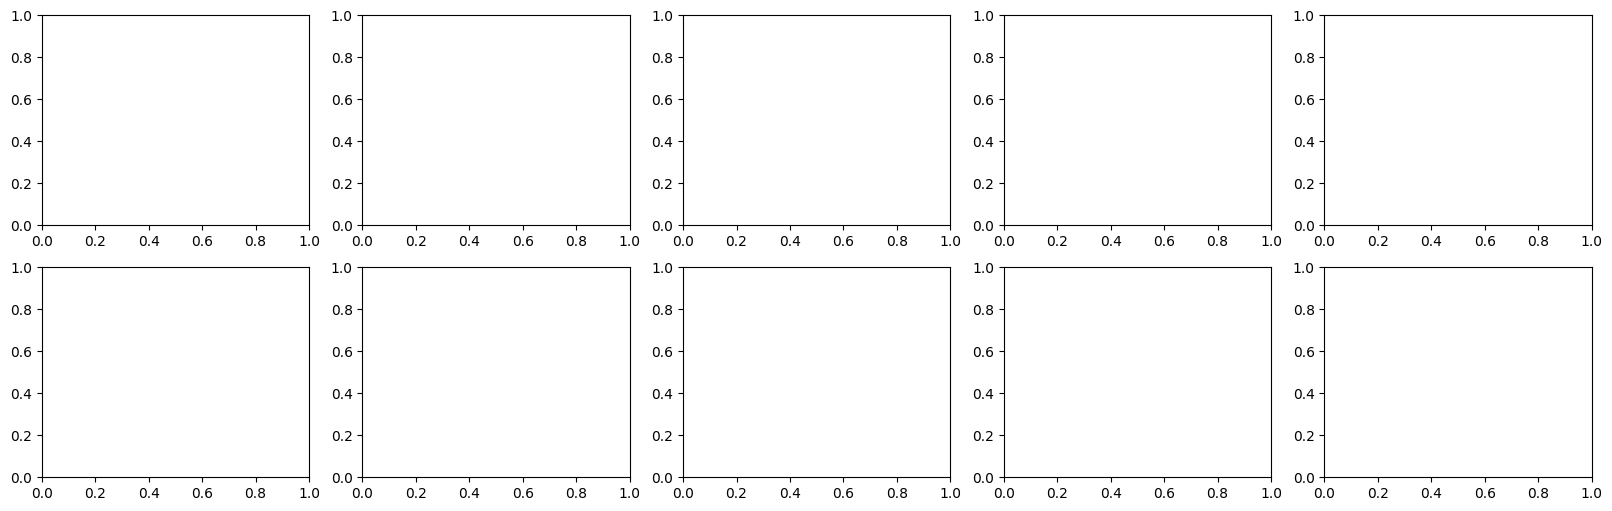

In [27]:
# Create figure and axis objects
row = int(num_samples / 5)

fig, ax = plt.subplots(row, 5, figsize=(20,row*3))

idx=0
for y in range(row):
  for x in range(5):
    # Plot each time series
    ax[y, x].plot(generated_data[idx], 'b')
    ax[y, x].set_title("Data {}".format(idx))

    idx += 1

# legend
plt.legend(labels=["Generated"], loc='center left', bbox_to_anchor=(1, 0.5))

# title
plt.suptitle("Generated Data without Smoothing")

# Customize the overall layout
plt.tight_layout()

# Show
plt.show()

## Smoothing it

In [24]:
# Apply the Savitzky-Golay filter
generated_data = smooth_wave(generated_data)

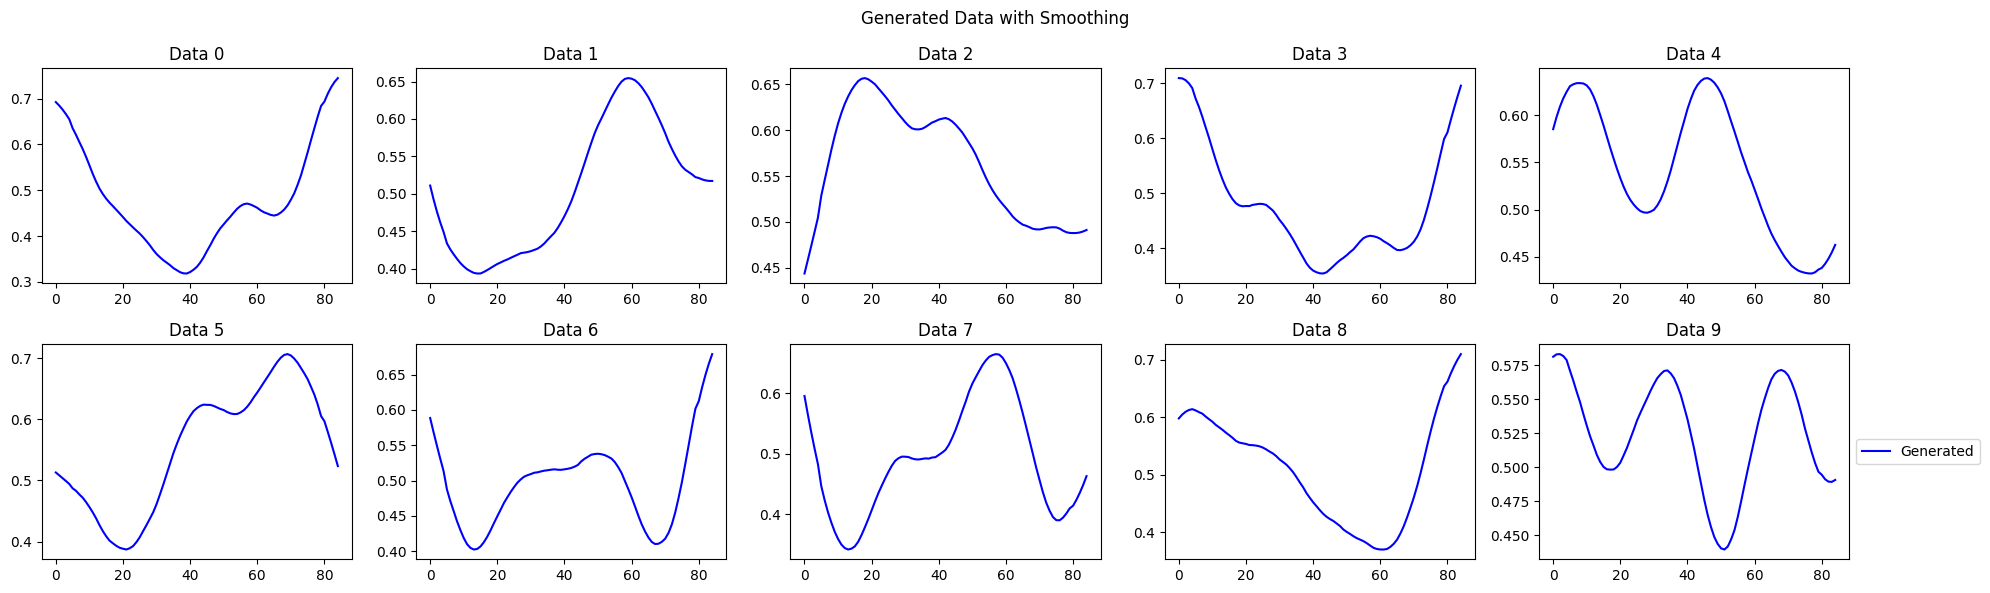

In [25]:
# Create figure and axis objects
row = int(num_samples / 5)

fig, ax = plt.subplots(row, 5, figsize=(20,row*3))

idx=0
for y in range(row):
  for x in range(5):
    # Plot each time series
    ax[y, x].plot(generated_data[idx], 'b')
    ax[y, x].set_title("Data {}".format(idx))

    idx += 1

# legend
plt.legend(labels=["Generated"], loc='center left', bbox_to_anchor=(1, 0.5))

# title
plt.suptitle("Generated Data with Smoothing")

# Customize the overall layout
plt.tight_layout()

# Show
plt.show()